In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from torch.utils.data import DataLoader

from segment.data import IRCAD2D
from segment.data.utils import train_valid_split

matplotlib.rcParams['figure.figsize'] = (30.0, 30.0)

In [6]:
PATH = '/Users/youngtodd/data/3DIRCADb1'
data = IRCAD2D(PATH, 'bone')
train, test = train_valid_split(data)

trainloader = DataLoader(train)
testloader = DataLoader(test)

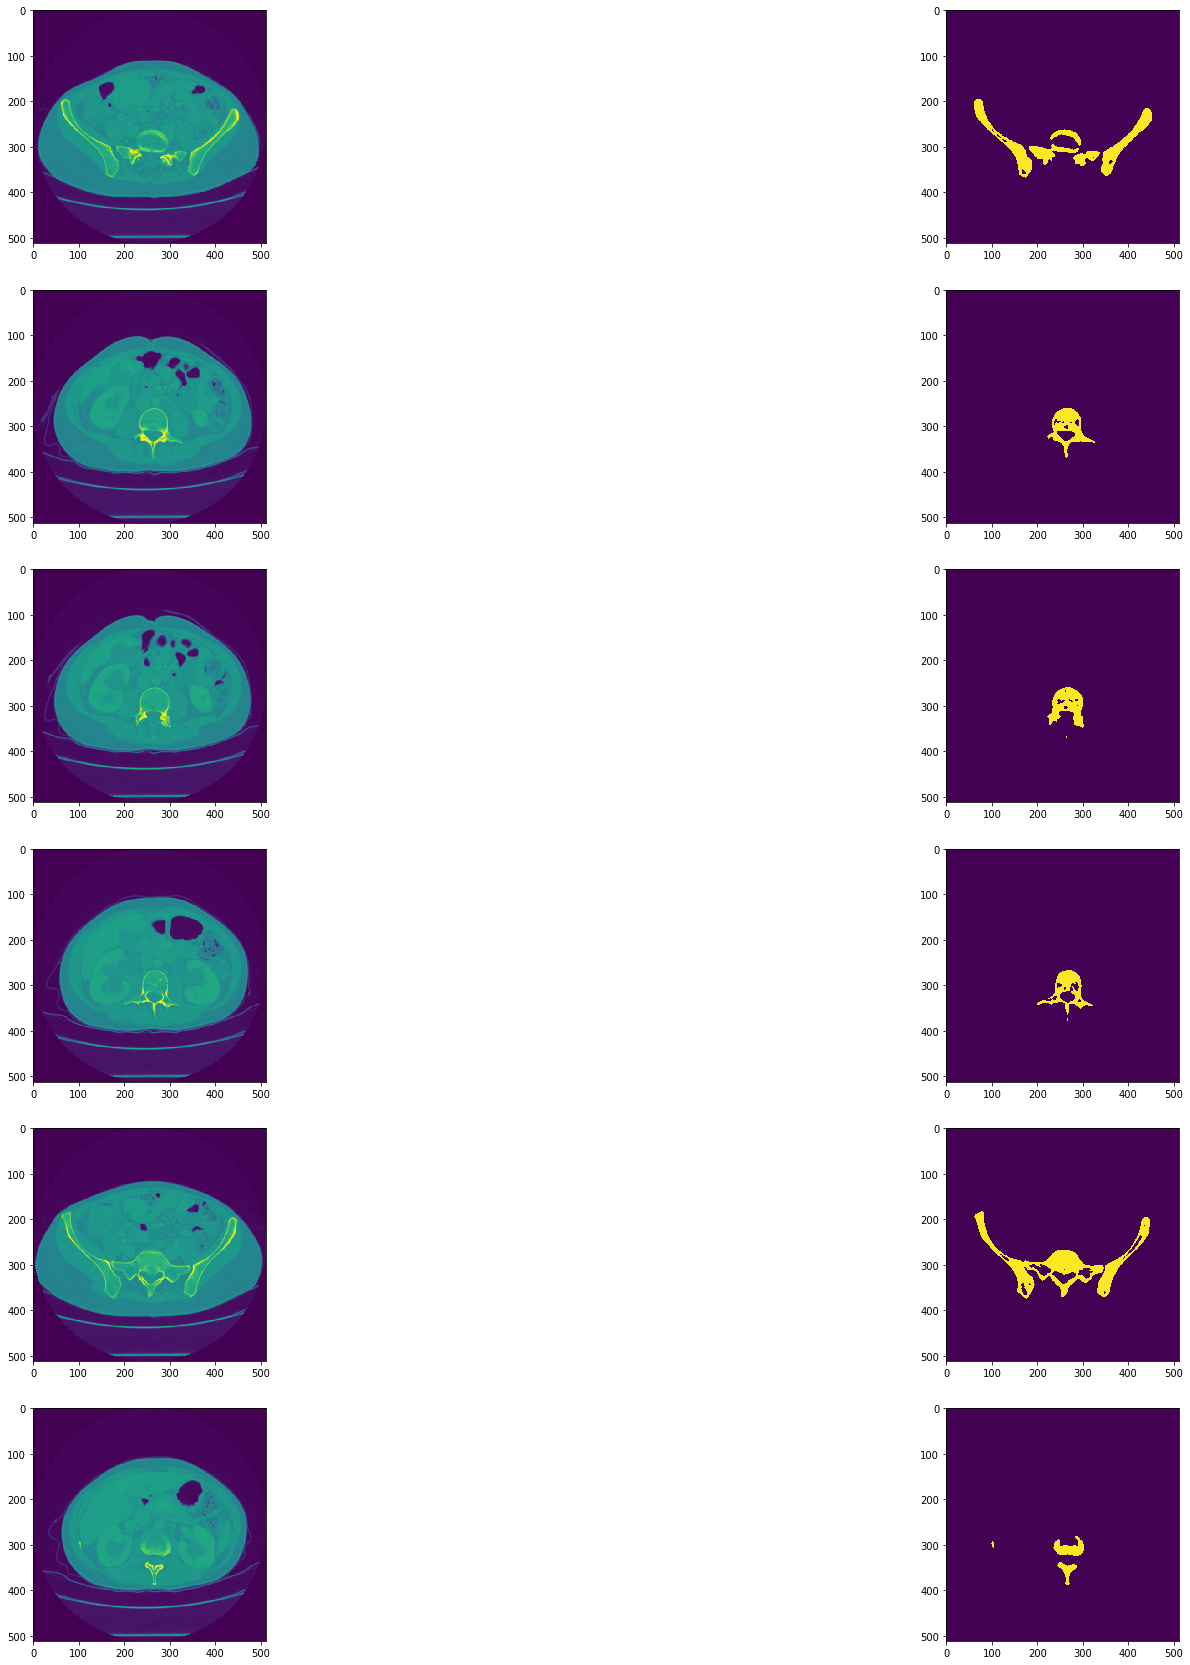

In [7]:
w=25
h=25
fig=plt.figure()

columns = 2
rows = 6
i = 1
for idx, (data, mask) in enumerate(trainloader):
    if idx >= 50:
        data = data.squeeze(0)
        fig.add_subplot(rows, columns, i)
        plt.imshow(data)
        mask = mask.squeeze(0)
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(mask)
        i += 2
    if idx == 55:
        break
    
plt.show()

In [8]:
# Check to make sure all masks are between 0 and 1
for idx, (data, mask) in enumerate(trainloader):
    mask = mask.numpy()
    assert (mask >= 0).all() and (mask <= 1).all()

In [9]:
mask

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)